In [ ]:
import numpy as np 
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision.transforms as transforms

In [ ]:
data = pd.read_csv('/content/train.csv')
print(data.shape)

(7453, 785)


In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#X & y
X = data.drop(['label'],1).values
y = data['label'].values

In [ ]:
X = X.reshape(-1,28,28,1)/255.0

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [ ]:
#print shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6335, 28, 28, 1) (1118, 28, 28, 1) (6335,) (1118,)


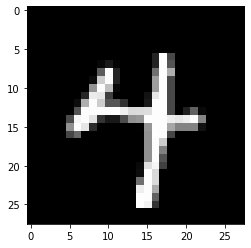

4


In [ ]:
# display sample image and the label
sample_index = 10
plt.imshow(X_train[sample_index].reshape(28,28),cmap='gray')
plt.show()
print(y_train[sample_index])

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, X, y, transforms=False):
        self.X, self.y = X , y
        self.transforms = transforms
    def __len__(self):
        return len(self.X)    
    def __getitem__(self, idx):        
        return self.transforms(self.X[idx]) , self.y[idx]

preprocess = transforms.Compose([
    transforms.ToTensor(),   
])

In [ ]:
# create data loaders
bs = 32
train_loader =  DataLoader(CustomDataset(X_train, y_train,  preprocess), batch_size = bs, shuffle=True)
test_loader  =  DataLoader(CustomDataset(X_test, y_test,  preprocess), batch_size = bs)

In [ ]:
len(train_loader)

198

In [ ]:
len(test_loader)

35

In [ ]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [ ]:
# testing data loader

x_temp, y_temp = iter(train_loader).next()

In [ ]:
print(x_temp.shape,y_temp.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [ ]:
for batch_idx, (X_batch, y_batch) in enumerate(test_loader):
    print(batch_idx,X_batch.shape,y_batch.shape)

0 torch.Size([32, 1, 28, 28]) torch.Size([32])
1 torch.Size([32, 1, 28, 28]) torch.Size([32])
2 torch.Size([32, 1, 28, 28]) torch.Size([32])
3 torch.Size([32, 1, 28, 28]) torch.Size([32])
4 torch.Size([32, 1, 28, 28]) torch.Size([32])
5 torch.Size([32, 1, 28, 28]) torch.Size([32])
6 torch.Size([32, 1, 28, 28]) torch.Size([32])
7 torch.Size([32, 1, 28, 28]) torch.Size([32])
8 torch.Size([32, 1, 28, 28]) torch.Size([32])
9 torch.Size([32, 1, 28, 28]) torch.Size([32])
10 torch.Size([32, 1, 28, 28]) torch.Size([32])
11 torch.Size([32, 1, 28, 28]) torch.Size([32])
12 torch.Size([32, 1, 28, 28]) torch.Size([32])
13 torch.Size([32, 1, 28, 28]) torch.Size([32])
14 torch.Size([32, 1, 28, 28]) torch.Size([32])
15 torch.Size([32, 1, 28, 28]) torch.Size([32])
16 torch.Size([32, 1, 28, 28]) torch.Size([32])
17 torch.Size([32, 1, 28, 28]) torch.Size([32])
18 torch.Size([32, 1, 28, 28]) torch.Size([32])
19 torch.Size([32, 1, 28, 28]) torch.Size([32])
20 torch.Size([32, 1, 28, 28]) torch.Size([32])
21

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(784,250)
        self.linear2 = nn.Linear(250,100)
        self.linear3 = nn.Linear(100,10)
    
    def forward(self,X):
        X = X.view(-1,784)
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = self.linear3(X)
        return F.softmax(X, dim=1)

In [ ]:
# model
model = MLP()

In [ ]:
print(model)

MLP(
  (linear1): Linear(in_features=784, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)


### We have 784*(250+1) + 250*(100+1) + 100*(10+1) = 222 360 parameters to train

In [ ]:
# weights 
for p in model.parameters():
    print(p.shape)

torch.Size([250, 784])
torch.Size([250])
torch.Size([100, 250])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [ ]:
forward_pass = model(x_temp.float())

In [ ]:
forward_pass.shape

torch.Size([32, 10])

In [ ]:
forward_pass[0]

tensor([0.0967, 0.0921, 0.0947, 0.1014, 0.1067, 0.0971, 0.0989, 0.1002, 0.1127,
        0.0995], grad_fn=<SelectBackward>)

In [ ]:
#what is the prediction
prediction = torch.max(forward_pass.data, 1)

In [ ]:
prediction

torch.return_types.max(values=tensor([0.1127, 0.1119, 0.1134, 0.1089, 0.1136, 0.1085, 0.1102, 0.1129, 0.1108,
        0.1100, 0.1136, 0.1152, 0.1103, 0.1149, 0.1142, 0.1159, 0.1130, 0.1120,
        0.1123, 0.1133, 0.1114, 0.1147, 0.1111, 0.1148, 0.1100, 0.1119, 0.1130,
        0.1153, 0.1134, 0.1142, 0.1134, 0.1141]), indices=tensor([8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8]))

In [ ]:
# we are interested in indices
prediction[1].shape

torch.Size([32])

In [ ]:
# remember softmax!
sum(forward_pass[0])

tensor(1., grad_fn=<AddBackward0>)

In [ ]:
# compare the predictions to the actual labels
for a, p in zip(y_temp,prediction[1]):
    print("Actual : ",a.item()," Predicted : ", p.item())

Actual :  4  Predicted :  8
Actual :  3  Predicted :  8
Actual :  1  Predicted :  8
Actual :  3  Predicted :  8
Actual :  0  Predicted :  8
Actual :  4  Predicted :  4
Actual :  2  Predicted :  8
Actual :  3  Predicted :  8
Actual :  0  Predicted :  8
Actual :  3  Predicted :  8
Actual :  0  Predicted :  8
Actual :  9  Predicted :  8
Actual :  5  Predicted :  8
Actual :  2  Predicted :  8
Actual :  2  Predicted :  8
Actual :  0  Predicted :  8
Actual :  6  Predicted :  8
Actual :  4  Predicted :  8
Actual :  6  Predicted :  8
Actual :  4  Predicted :  8
Actual :  7  Predicted :  8
Actual :  5  Predicted :  8
Actual :  8  Predicted :  8
Actual :  4  Predicted :  8
Actual :  7  Predicted :  8
Actual :  7  Predicted :  8
Actual :  9  Predicted :  8
Actual :  0  Predicted :  8
Actual :  8  Predicted :  8
Actual :  3  Predicted :  8
Actual :  9  Predicted :  8
Actual :  5  Predicted :  8


In [ ]:
# how bad are we doing
# GD
E = nn.CrossEntropyLoss()
e = E(forward_pass,y_temp) # raw output values & the actual

In [ ]:
print(e)

tensor(2.3027, grad_fn=<NllLossBackward>)


## Train

In [ ]:
# GD
optimizer = torch.optim.SGD(model.parameters(),lr=0.001,momentum=0.9) #lr=0.001
error = nn.CrossEntropyLoss()
EPOCHS = 50

In [ ]:
def fit(model, train_loader):
    model.train()
    for epoch in range(EPOCHS):
        correct = 0
        for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
            X_batch = X_batch.float()           
            optimizer.zero_grad()
            output = model(X_batch)
            loss = error(output, y_batch)
            loss.backward()
            optimizer.step()
            # Total correct predictions
            predicted = torch.max(output.data, 1)[1] 
            correct += (predicted == y_batch).sum()
            if batch_idx % 100 == 0:
                print('Epoch : {} \t Accuracy:{:.3f}%'.format(epoch, correct*100/float(bs*(batch_idx+1))))

In [ ]:
fit(model, train_loader)

Epoch : 0 	 Accuracy:18.750%
Epoch : 0 	 Accuracy:10.458%
Epoch : 1 	 Accuracy:3.125%
Epoch : 1 	 Accuracy:9.994%
Epoch : 2 	 Accuracy:3.125%
Epoch : 2 	 Accuracy:9.839%
Epoch : 3 	 Accuracy:9.375%
Epoch : 3 	 Accuracy:9.994%
Epoch : 4 	 Accuracy:18.750%
Epoch : 4 	 Accuracy:9.251%
Epoch : 5 	 Accuracy:9.375%
Epoch : 5 	 Accuracy:10.675%
Epoch : 6 	 Accuracy:6.250%
Epoch : 6 	 Accuracy:9.623%
Epoch : 7 	 Accuracy:9.375%
Epoch : 7 	 Accuracy:9.623%
Epoch : 8 	 Accuracy:12.500%
Epoch : 8 	 Accuracy:9.963%
Epoch : 9 	 Accuracy:9.375%
Epoch : 9 	 Accuracy:9.746%
Epoch : 10 	 Accuracy:12.500%
Epoch : 10 	 Accuracy:9.623%
Epoch : 11 	 Accuracy:6.250%
Epoch : 11 	 Accuracy:9.437%
Epoch : 12 	 Accuracy:18.750%
Epoch : 12 	 Accuracy:10.334%
Epoch : 13 	 Accuracy:6.250%
Epoch : 13 	 Accuracy:9.220%
Epoch : 14 	 Accuracy:9.375%
Epoch : 14 	 Accuracy:9.499%
Epoch : 15 	 Accuracy:3.125%
Epoch : 15 	 Accuracy:10.365%
Epoch : 16 	 Accuracy:3.125%
Epoch : 16 	 Accuracy:10.303%
Epoch : 17 	 Accuracy:6.

In [ ]:
def evaluate(model):
    correct = 0 
    for test_imgs, test_labels in test_loader:
        test_imgs = test_imgs.float()
        output = model(test_imgs)
        predicted = torch.max(output,1)[1]
        correct += (predicted == test_labels).sum()
    print("Test accuracy:{:.3f}% ".format( float(correct) / (len(test_loader)*bs)))


In [ ]:
evaluate(model)

Test accuracy:0.107% 
